#### Name : Tazmeen Afroz
#### 22P-9252
#### BAI-5A
#### ML-LAB-TASK-09

In [35]:
import pandas as pd
import numpy as np

data = pd.read_csv('./framingham.csv')
data.tail(9)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4229,0,51,3.0,1,20.0,0.0,0,1,0,251.0,140.0,80.0,25.60,75.0,NaN,0
4230,0,56,1.0,1,3.0,0.0,0,1,0,268.0,170.0,102.0,22.89,57.0,NaN,0
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [37]:
#missing values in the dataset
print("missing values in the dataset")
print(data.isnull().sum())

missing values in the dataset
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [38]:
#handling missing values

#filling missing values with mean
data = data.fillna(data.mean())

#missing values in the dataset
print("missing values in the dataset")
print(data.isnull().sum())



missing values in the dataset
male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [39]:
# visualizing the dataset

import plotly.express as px

#correlation matrix
correlation_matrix = data.corr()
fig = px.imshow(correlation_matrix)
fig.show()


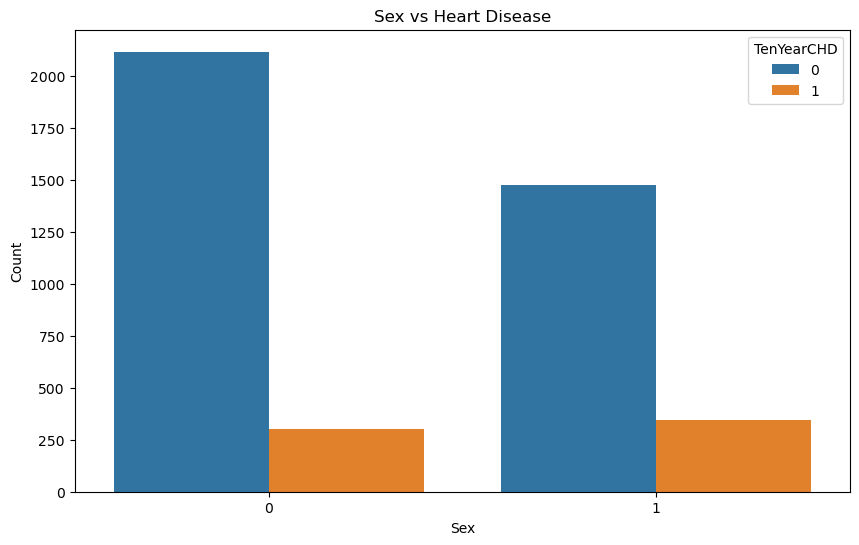

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot Crosstab 
plt.figure(figsize=(10, 6))
sns.countplot(x='male', hue='TenYearCHD', data=data)
plt.title('Sex vs Heart Disease')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='TenYearCHD')
plt.show()

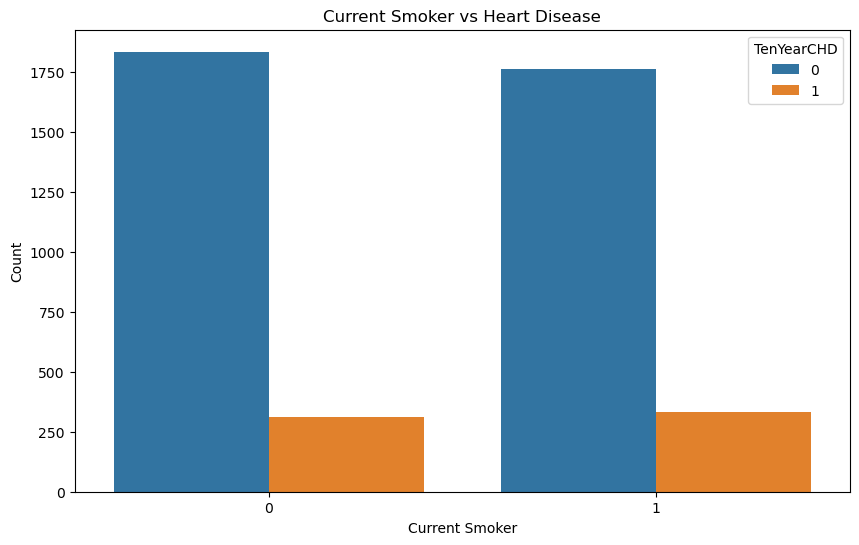

In [41]:
#crossplot currentSmoker vs TenYearCHD
plt.figure(figsize=(10, 6))
sns.countplot(x='currentSmoker', hue='TenYearCHD', data=data)
plt.title('Current Smoker vs Heart Disease')
plt.xlabel('Current Smoker')
plt.ylabel('Count')
plt.legend(title='TenYearCHD')
plt.show()


In [42]:
#logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = data.drop(['TenYearCHD'], axis=1)
y = data['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))



Accuracy:  0.8584905660377359
Confusion Matrix: 
 [[718   6]
 [114  10]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.62      0.08      0.14       124

    accuracy                           0.86       848
   macro avg       0.74      0.54      0.53       848
weighted avg       0.83      0.86      0.81       848



/home/tazmeen/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



#### RESULTS
#### Accuracy:  0.86206896551724